# Necessary Comment : jupyter notebook

## Necessary Lighbary



In [1]:
import sqlite3
import pandas as pd
import talib
import mplfinance as mpf
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## Database Connection

In [3]:
#connection = sqlite3.connect(r"cripto.db")
connection = sqlite3.connect(r"big_data.db")
cur = connection.cursor()
database_data = cur.execute("select * from asset order by CloseTime").fetchall()

## Dataframe

In [4]:
df = pd.DataFrame(database_data)
df = df.head(10000)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,742859,BTCBUSD,19998.23,20002.69,19995.19,19998.21,9.474930,-0.000100008850785477,1.661659e+12,1.894831e+05,441.0,6.187260,1661658480
1,742483,BTCBUSD,19997.02,19998.00,19997.00,19997.00,2.829590,-0.000100014902222614,1.661636e+12,5.658343e+04,173.0,0.973320,1661635920
2,743891,BTCBUSD,19987.76,19998.62,19985.14,19987.74,25.911260,-0.000100061237461319,1.661720e+12,5.180279e+05,642.0,17.762630,1661720400
3,576835,BTCBUSD,39858.07,39858.07,39853.57,39858.03,1.005430,-0.000100356088493179,1.651697e+12,4.007142e+04,89.0,0.707620,1651697040
4,66429,BTCBUSD,49822.29,49860.68,49803.54,49822.24,7.058411,-0.000100356687745405,1.621049e+12,3.517801e+05,238.0,3.036725,1621049280
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,795753,BTCBUSD,19567.71,19569.06,19566.93,19567.48,12.768150,-0.00117540580885328,1.664832e+12,2.498456e+05,202.0,3.977180,1664832120
9996,43394,BTCBUSD,54441.07,54447.29,54435.73,54440.43,3.107548,-0.00117558306623918,1.619667e+12,1.691755e+05,167.0,1.183298,1619667180
9997,524283,BTCBUSD,47623.51,47623.51,47608.55,47622.95,2.577080,-0.00117588980737654,1.648544e+12,1.227068e+05,146.0,1.552610,1648543920
9998,989125,BTCBUSD,22108.84,22109.89,22105.88,22108.58,17.089270,-0.00117600018815279,1.676434e+12,3.778045e+05,587.0,8.773150,1676434440


## Name Columns

In [5]:
df.columns = ['Id', 'Symbol', 'Open', 'High', 'Low', 'Close', 'VolumeBTC', 'Change', 'CloseTime','VolumeBUSD', 'Trades', 'BuyQuoteVolume', 'Time']
# df = df.iloc[:, 2:12]
df


,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,CloseTime,VolumeBUSD,Trades,BuyQuoteVolume,Time
0,742859,BTCBUSD,19998.23,20002.69,19995.19,19998.21,9.474930,-0.000100008850785477,1.661659e+12,1.894831e+05,441.0,6.187260,1661658480
1,742483,BTCBUSD,19997.02,19998.00,19997.00,19997.00,2.829590,-0.000100014902222614,1.661636e+12,5.658343e+04,173.0,0.973320,1661635920
2,743891,BTCBUSD,19987.76,19998.62,19985.14,19987.74,25.911260,-0.000100061237461319,1.661720e+12,5.180279e+05,642.0,17.762630,1661720400
3,576835,BTCBUSD,39858.07,39858.07,39853.57,39858.03,1.005430,-0.000100356088493179,1.651697e+12,4.007142e+04,89.0,0.707620,1651697040
4,66429,BTCBUSD,49822.29,49860.68,49803.54,49822.24,7.058411,-0.000100356687745405,1.621049e+12,3.517801e+05,238.0,3.036725,1621049280
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,795753,BTCBUSD,19567.71,19569.06,19566.93,19567.48,12.768150,-0.00117540580885328,1.664832e+12,2.498456e+05,202.0,3.977180,1664832120
9996,43394,BTCBUSD,54441.07,54447.29,54435.73,54440.43,3.107548,-0.00117558306623918,1.619667e+12,1.691755e+05,167.0,1.183298,1619667180
9997,524283,BTCBUSD,47623.51,47623.51,47608.55,47622.95,2.577080,-0.00117588980737654,1.648544e+12,1.227068e+05,146.0,1.552610,1648543920
9998,989125,BTCBUSD,22108.84,22109.89,22105.88,22108.58,17.089270,-0.00117600018815279,1.676434e+12,3.778045e+05,587.0,8.773150,1676434440


# Make a Candle plot

In [6]:
df = df.set_index('CloseTime')
df.index = pd.to_datetime(df.index, unit='ms')
# df = df.tail(100)
df

,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,VolumeBUSD,Trades,BuyQuoteVolume,Time
CloseTime,,,,,,,,,,,,
2022-08-28 03:48:59.999000064,742859,BTCBUSD,19998.23,20002.69,19995.19,19998.21,9.474930,-0.000100008850785477,1.894831e+05,441.0,6.187260,1661658480
2022-08-27 21:32:59.999000064,742483,BTCBUSD,19997.02,19998.00,19997.00,19997.00,2.829590,-0.000100014902222614,5.658343e+04,173.0,0.973320,1661635920
2022-08-28 21:00:59.999000064,743891,BTCBUSD,19987.76,19998.62,19985.14,19987.74,25.911260,-0.000100061237461319,5.180279e+05,642.0,17.762630,1661720400
2022-05-04 20:44:59.999000064,576835,BTCBUSD,39858.07,39858.07,39853.57,39858.03,1.005430,-0.000100356088493179,4.007142e+04,89.0,0.707620,1651697040
2021-05-15 03:28:59.999000064,66429,BTCBUSD,49822.29,49860.68,49803.54,49822.24,7.058411,-0.000100356687745405,3.517801e+05,238.0,3.036725,1621049280
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-03 21:22:59.999000064,795753,BTCBUSD,19567.71,19569.06,19566.93,19567.48,12.768150,-0.00117540580885328,2.498456e+05,202.0,3.977180,1664832120
2021-04-29 03:33:59.999000064,43394,BTCBUSD,54441.07,54447.29,54435.73,54440.43,3.107548,-0.00117558306623918,1.691755e+05,167.0,1.183298,1619667180
2022-03-29 08:52:59.999000064,524283,BTCBUSD,47623.51,47623.51,47608.55,47622.95,2.577080,-0.00117588980737654,1.227068e+05,146.0,1.552610,1648543920


# Make a Custom Pattern

In [7]:
# # TODO: ALL all 100 and -100 to the X asis
# # Find Candle Pattern
ENGULFING = talib.CDLENGULFING(df['Open'], df['High'], df['Low'],
                                         df['Close'])
ENGULFING
ENGULFING[ENGULFING != 0]

# bullish_engulfing = (ENGULFING.replace([-100, 0], np.nan)/100) *(df.Low-2)
# bearsh_engulfing = (-ENGULFING.replace([100, 0], np.nan)/100) *(df.High *1.0001)

# addplot = [mpf.make_addplot(bullish_engulfing, type='scatter', color='g', marker = "^"), mpf.make_addplot(bearsh_engulfing, type='scatter', color='r', marker = "v")]
# mpf.plot(df, addplot = addplot,title=f"Engulfing Signal", type="candle",style="yahoo")

Series([], dtype: int32)

In [8]:
# dir(talib)

In [9]:
"""
means you are dropping duplicket column.
https://stackoverflow.com/questions/35084071/concat-dataframe-reindexing-only-valid-with-uniquely-valued-index-objects

"""
# df = df.head(100)
df = df.reset_index(drop=True)
df

,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,VolumeBUSD,Trades,BuyQuoteVolume,Time
0,742859,BTCBUSD,19998.23,20002.69,19995.19,19998.21,9.474930,-0.000100008850785477,1.894831e+05,441.0,6.187260,1661658480
1,742483,BTCBUSD,19997.02,19998.00,19997.00,19997.00,2.829590,-0.000100014902222614,5.658343e+04,173.0,0.973320,1661635920
2,743891,BTCBUSD,19987.76,19998.62,19985.14,19987.74,25.911260,-0.000100061237461319,5.180279e+05,642.0,17.762630,1661720400
3,576835,BTCBUSD,39858.07,39858.07,39853.57,39858.03,1.005430,-0.000100356088493179,4.007142e+04,89.0,0.707620,1651697040
4,66429,BTCBUSD,49822.29,49860.68,49803.54,49822.24,7.058411,-0.000100356687745405,3.517801e+05,238.0,3.036725,1621049280
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,795753,BTCBUSD,19567.71,19569.06,19566.93,19567.48,12.768150,-0.00117540580885328,2.498456e+05,202.0,3.977180,1664832120
9996,43394,BTCBUSD,54441.07,54447.29,54435.73,54440.43,3.107548,-0.00117558306623918,1.691755e+05,167.0,1.183298,1619667180
9997,524283,BTCBUSD,47623.51,47623.51,47608.55,47622.95,2.577080,-0.00117588980737654,1.227068e+05,146.0,1.552610,1648543920
9998,989125,BTCBUSD,22108.84,22109.89,22105.88,22108.58,17.089270,-0.00117600018815279,3.778045e+05,587.0,8.773150,1676434440


In [19]:
patterns = pd.DataFrame(results).T
patterns.columns = cols
patterns.astype(float)
patterns['rsi'] = df['rsisignal']
patterns["Sum"] = patterns.sum(axis=1)
patterns

,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,CDLBELTHOLD,...,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLTRISTAR,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS,rsi,Sum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,100,0,0,0,0,0,0,0.0,400.0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,100,0,0,0,0.0,300.0
9997,0,0,0,0,0,0,0,0,0,-100,...,0,100,0,0,-100,0,0,0,0.0,300.0
9998,0,0,0,0,0,0,0,0,0,0,...,0,100,0,0,0,0,0,0,0.0,400.0


In [13]:
df['rsi'] = talib.RSI(df['Close'], timeperiod=5)
# print(data['rsi'].to_string())

# Generate signals
df['rsisignal'] = 0
df.loc[df['rsi'] > 70, 'rsisignal'] = -100
df.loc[df['rsi'] < 30, 'rsisignal'] = 100
# df['rsisignal'] = df['rsisignal'].fillna(0)

print(df['rsisignal'].to_string())


0         0
1         0
2         0
3         0
4         0
5      -100
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18     -100
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
30        0
31        0
32        0
33        0
34        0
35        0
36        0
37        0
38        0
39        0
40        0
41        0
42        0
43        0
44        0
45        0
46        0
47        0
48        0
49        0
50        0
51        0
52        0
53        0
54        0
55        0
56        0
57        0
58        0
59        0
60        0
61        0
62        0
63        0
64        0
65        0
66        0
67        0
68        0
69        0
70        0
71        0
72        0
73        0
74        0
75        0
76        0
77     -100
78        0
79        0
80        0
81        0
82        0
83  

# Make Dataframe From Binance Data

## Get Result and All the candlesticks from Ta-Lib

In [14]:
results = []
cols = []
for attr in dir(talib):
    if attr[:3]=='CDL':
#         print(getattr(talib, attr))
        res = getattr(talib, attr)(df['Open'], df['High'], df['Low'],
                                         df['Close'])
        results.append(res)
        cols.append(attr)
print(results)
print(cols)

[0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Length: 10000, dtype: int32, 0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Length: 10000, dtype: int32, 0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Length: 10000, dtype: int32, 0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Length: 10000, dtype: int32, 0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Length: 10000, dtype: int32, 0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Length: 10000, dtype: int32, 0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Length: 10000, dtype: int32, 0       0
1       0
2     

## Frame all candle and add sum of the candle result

## Saferate Numeracdata from dataframe

In [15]:
df = df.drop(['Symbol', 'Id', 'Time'], axis=1)

In [16]:
# df = df.iloc[:,0:10]
# x

## Combine two Dataframe

In [17]:
df = df.astype(float)


In [20]:
df = df.add(patterns, fill_value=0)
df

,BuyQuoteVolume,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,...,Close,High,Low,Open,Sum,Trades,VolumeBTC,VolumeBUSD,rsi,rsisignal
0,6.187260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19998.21,20002.69,19995.19,19998.23,0.0,441.0,9.474930,1.894831e+05,0.000000,0.0
1,0.973320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19997.00,19998.00,19997.00,19997.02,0.0,173.0,2.829590,5.658343e+04,0.000000,0.0
2,17.762630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19987.74,19998.62,19985.14,19987.76,0.0,642.0,25.911260,5.180279e+05,0.000000,0.0
3,0.707620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,39858.03,39858.07,39853.57,39858.07,0.0,89.0,1.005430,4.007142e+04,0.000000,0.0
4,3.036725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,49822.24,49860.68,49803.54,49822.29,0.0,238.0,7.058411,3.517801e+05,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3.977180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19567.48,19569.06,19566.93,19567.71,400.0,202.0,12.768150,2.498456e+05,40.971181,0.0
9996,1.183298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54440.43,54447.29,54435.73,54441.07,300.0,167.0,3.107548,1.691755e+05,63.907507,0.0
9997,1.552610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,47622.95,47623.51,47608.55,47623.51,300.0,146.0,2.577080,1.227068e+05,58.365569,0.0
9998,8.773150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22108.58,22109.89,22105.88,22108.84,400.0,587.0,17.089270,3.778045e+05,41.521312,0.0


## Make a plot to see the sum

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
9995    800.0
9996    600.0
9997    600.0
9998    800.0
9999      0.0
Length: 10000, dtype: float64


<AxesSubplot: >

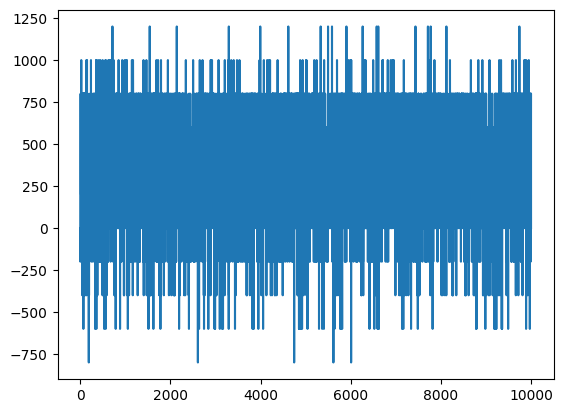

In [21]:
all_pats = patterns.sum(axis=1)
print(all_pats)
all_pats.plot()

In [ ]:
# sns.pairplot(df.head(10000))

## X paramiter for feeding Model

In [22]:
X = df.drop(['Sum','rsi','rsisignal'], axis=1)
X

,BuyQuoteVolume,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,...,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS,Change,Close,High,Low,Open,Trades,VolumeBTC,VolumeBUSD
0,6.187260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.000100,19998.21,20002.69,19995.19,19998.23,441.0,9.474930,1.894831e+05
1,0.973320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.000100,19997.00,19998.00,19997.00,19997.02,173.0,2.829590,5.658343e+04
2,17.762630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.000100,19987.74,19998.62,19985.14,19987.76,642.0,25.911260,5.180279e+05
3,0.707620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.000100,39858.03,39858.07,39853.57,39858.07,89.0,1.005430,4.007142e+04
4,3.036725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.000100,49822.24,49860.68,49803.54,49822.29,238.0,7.058411,3.517801e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3.977180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.001175,19567.48,19569.06,19566.93,19567.71,202.0,12.768150,2.498456e+05
9996,1.183298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.001176,54440.43,54447.29,54435.73,54441.07,167.0,3.107548,1.691755e+05
9997,1.552610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.001176,47622.95,47623.51,47608.55,47623.51,146.0,2.577080,1.227068e+05
9998,8.773150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.001176,22108.58,22109.89,22105.88,22108.84,587.0,17.089270,3.778045e+05


## Y paramiter for feedind Model

In [23]:
y = df['Sum']
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
9995    400.0
9996    300.0
9997    300.0
9998    400.0
9999      0.0
Name: Sum, Length: 10000, dtype: float64

## Model for AI Research

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model = DecisionTreeClassifier()
# model=RandomForestClassifier()
model

## Fit X and y data to model

In [ ]:
# model.fit(X, y)

## Calculating the Accuracy
### Normally I take very small data for that but in real application we have to take very big dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.1)

model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(predictions[:5])
print(len(predictions))
print(y_test[:5])
accuracy_score(y_test, predictions)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.1)

## Export Train model

## Directally Grab Fidable data from internet but it have to be superviged test data from database

## Make Prediction With Train Model

In [ ]:
from dataframe import GetDataframe
symbol = "BTCBUSD"

df = GetDataframe().get_minute_data(symbol, 1, 5)
df = df.iloc[:,0:10]
df.astype(float)
# df = df.drop(columns=['symbol','VolumeBUSD', 'CloseTime'])
# df = df.iloc[0]
# print(df)
results = []
cols = []
for attr in dir(talib):
    if attr[:3]=='CDL':
#         print(getattr(talib, attr))
        res = getattr(talib, attr)(df['Open'], df['High'], df['Low'],
                                         df['Close'])
        results.append(res)
        cols.append(attr)
# print(results)
# print(cols)

patterns = pd.DataFrame(results).T
patterns.columns = cols
patterns.astype(float)
patterns["Sum"] = patterns.sum(axis=1)
patterns
df = df.add(patterns, fill_value=0)
df = df.drop(['CloseTime', 'Sum'], axis=1)
df = df.iloc[-2]
# print(df)
print(model.predict([df]))

In [ ]:
# print(df)

model = joblib.load("btcbusd_trand_predictor.joblib")
predictions = model.predict([df])
predictions

## Use Tensorflow

In [25]:
X_train.shape

(9000, 70)

In [26]:
len(X_train)

9000

In [27]:
y_train.shape

(9000,)

In [28]:
import tensorflow as tf
model = tf.keras.models.Sequential()

In [29]:
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(1))


In [30]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [32]:
model.fit(X_train,y_train, epochs=500)

Epoch 1/500
282/282 [==============================] - 2s 3ms/step - loss: 148079824.0000 - accuracy: 0.0570
Epoch 2/500
282/282 [==============================] - 1s 3ms/step - loss: 41601.1367 - accuracy: 0.0210
Epoch 3/500
282/282 [==============================] - 1s 3ms/step - loss: 153894.8281 - accuracy: 0.0342
Epoch 4/500
282/282 [==============================] - 1s 3ms/step - loss: 535421.0625 - accuracy: 0.0568
Epoch 5/500
282/282 [==============================] - 1s 3ms/step - loss: 319604128.0000 - accuracy: 0.0822
Epoch 6/500
282/282 [==============================] - 1s 3ms/step - loss: 59202.6562 - accuracy: 0.0119
Epoch 7/500
282/282 [==============================] - 1s 3ms/step - loss: 19556.0996 - accuracy: 0.0091
Epoch 8/500
282/282 [==============================] - 1s 3ms/step - loss: 18493.4238 - accuracy: 0.0081
Epoch 9/500
282/282 [==============================] - 1s 3ms/step - loss: 18070.4863 - accuracy: 0.0100
Epoch 10/500
282/282 [=======================

282/282 [==============================] - 1s 3ms/step - loss: 2019.2780 - accuracy: 0.0818
Epoch 79/500
282/282 [==============================] - 1s 3ms/step - loss: 1754.0165 - accuracy: 0.0831
Epoch 80/500
282/282 [==============================] - 1s 3ms/step - loss: 1351.7275 - accuracy: 0.0949
Epoch 81/500
282/282 [==============================] - 1s 3ms/step - loss: 2035.9207 - accuracy: 0.0806
Epoch 82/500
282/282 [==============================] - 1s 3ms/step - loss: 952.7686 - accuracy: 0.0933
Epoch 83/500
282/282 [==============================] - 1s 3ms/step - loss: 2532.5088 - accuracy: 0.0778
Epoch 84/500
282/282 [==============================] - 1s 3ms/step - loss: 1520.7528 - accuracy: 0.0849
Epoch 85/500
282/282 [==============================] - 1s 3ms/step - loss: 877.0359 - accuracy: 0.0906
Epoch 86/500
282/282 [==============================] - 1s 3ms/step - loss: 947.6183 - accuracy: 0.0804
Epoch 87/500
282/282 [==============================] - 1s 3ms/step - l

282/282 [==============================] - 2s 7ms/step - loss: 627.5258 - accuracy: 0.0812
Epoch 156/500
282/282 [==============================] - 1s 4ms/step - loss: 971.7596 - accuracy: 0.0691
Epoch 157/500
282/282 [==============================] - 1s 4ms/step - loss: 1249.0046 - accuracy: 0.0747
Epoch 158/500
282/282 [==============================] - 1s 3ms/step - loss: 1086.8488 - accuracy: 0.0942
Epoch 159/500
282/282 [==============================] - 1s 4ms/step - loss: 1523.9268 - accuracy: 0.0544
Epoch 160/500
282/282 [==============================] - 1s 3ms/step - loss: 838.4583 - accuracy: 0.0744
Epoch 161/500
282/282 [==============================] - 1s 4ms/step - loss: 769.5813 - accuracy: 0.0912
Epoch 162/500
282/282 [==============================] - 1s 4ms/step - loss: 826.4118 - accuracy: 0.0893
Epoch 163/500
282/282 [==============================] - 1s 4ms/step - loss: 1240.0509 - accuracy: 0.0674
Epoch 164/500
282/282 [==============================] - 1s 3ms/s

282/282 [==============================] - 1s 3ms/step - loss: 1283.7012 - accuracy: 0.0978
Epoch 233/500
282/282 [==============================] - 1s 4ms/step - loss: 943.3792 - accuracy: 0.0766
Epoch 234/500
282/282 [==============================] - 1s 4ms/step - loss: 1523.5389 - accuracy: 0.0748
Epoch 235/500
282/282 [==============================] - 1s 3ms/step - loss: 891.7909 - accuracy: 0.0688
Epoch 236/500
282/282 [==============================] - 1s 3ms/step - loss: 859.1635 - accuracy: 0.0914
Epoch 237/500
282/282 [==============================] - 1s 3ms/step - loss: 563.6608 - accuracy: 0.1158
Epoch 238/500
282/282 [==============================] - 1s 3ms/step - loss: 2447.3489 - accuracy: 0.0490
Epoch 239/500
282/282 [==============================] - 1s 3ms/step - loss: 1148.0093 - accuracy: 0.1073
Epoch 240/500
282/282 [==============================] - 1s 3ms/step - loss: 673.5956 - accuracy: 0.1180
Epoch 241/500
282/282 [==============================] - 1s 3ms/s

Epoch 310/500
282/282 [==============================] - 1s 4ms/step - loss: 793.8578 - accuracy: 0.1019
Epoch 311/500
282/282 [==============================] - 1s 3ms/step - loss: 747.4855 - accuracy: 0.0938
Epoch 312/500
282/282 [==============================] - 1s 3ms/step - loss: 694.2936 - accuracy: 0.0999
Epoch 313/500
282/282 [==============================] - 1s 3ms/step - loss: 712.7835 - accuracy: 0.0971
Epoch 314/500
282/282 [==============================] - 1s 3ms/step - loss: 514.0068 - accuracy: 0.0983
Epoch 315/500
282/282 [==============================] - 1s 3ms/step - loss: 1205.9515 - accuracy: 0.0940
Epoch 316/500
282/282 [==============================] - 1s 4ms/step - loss: 563.8342 - accuracy: 0.1093
Epoch 317/500
282/282 [==============================] - 1s 4ms/step - loss: 607.4257 - accuracy: 0.1040
Epoch 318/500
282/282 [==============================] - 1s 4ms/step - loss: 873.4276 - accuracy: 0.0957
Epoch 319/500
282/282 [==============================]

282/282 [==============================] - 1s 3ms/step - loss: 550.6512 - accuracy: 0.1033
Epoch 389/500
282/282 [==============================] - 1s 3ms/step - loss: 549.1956 - accuracy: 0.1002
Epoch 390/500
282/282 [==============================] - 1s 3ms/step - loss: 1391.3517 - accuracy: 0.0867
Epoch 391/500
282/282 [==============================] - 1s 4ms/step - loss: 597.5726 - accuracy: 0.1017
Epoch 392/500
282/282 [==============================] - 1s 3ms/step - loss: 1063.3212 - accuracy: 0.0983
Epoch 393/500
282/282 [==============================] - 1s 3ms/step - loss: 1281.7709 - accuracy: 0.0841
Epoch 394/500
282/282 [==============================] - 1s 3ms/step - loss: 1026.3242 - accuracy: 0.0923
Epoch 395/500
282/282 [==============================] - 1s 3ms/step - loss: 965.6751 - accuracy: 0.0979
Epoch 396/500
282/282 [==============================] - 1s 3ms/step - loss: 703.3776 - accuracy: 0.0993
Epoch 397/500
282/282 [==============================] - 1s 3ms/s

282/282 [==============================] - 1s 3ms/step - loss: 724.7560 - accuracy: 0.0941
Epoch 467/500
282/282 [==============================] - 1s 3ms/step - loss: 674.3193 - accuracy: 0.0969
Epoch 468/500
282/282 [==============================] - 1s 3ms/step - loss: 874.9365 - accuracy: 0.0966
Epoch 469/500
282/282 [==============================] - 1s 3ms/step - loss: 595.3601 - accuracy: 0.1099
Epoch 470/500
282/282 [==============================] - 1s 3ms/step - loss: 590.5938 - accuracy: 0.0973
Epoch 471/500
282/282 [==============================] - 1s 3ms/step - loss: 809.6577 - accuracy: 0.0880
Epoch 472/500
282/282 [==============================] - 1s 3ms/step - loss: 548.3441 - accuracy: 0.1010
Epoch 473/500
282/282 [==============================] - 1s 3ms/step - loss: 607.1573 - accuracy: 0.1017
Epoch 474/500
282/282 [==============================] - 1s 3ms/step - loss: 629.0645 - accuracy: 0.0948
Epoch 475/500
282/282 [==============================] - 1s 3ms/step 

In [33]:
import joblib
# model = model.fit(X_train, y_train)
joblib.dump(model, "btcbusd_trand_predictor_tf.joblib")

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-03-23 10:37:57         1791
metadata.json                                  2023-03-23 10:37:57           64
variables.h5                                   2023-03-23 10:37:57      1033432


['btcbusd_trand_predictor_tf.joblib']

In [46]:
model = joblib.load("btcbusd_trand_predictor_tf.joblib")
predictions = model.predict(X_test)
predictions[:10]

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-03-23 10:37:56         1791
metadata.json                                  2023-03-23 10:37:56           64
variables.h5                                   2023-03-23 10:37:56      1033432
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
32/32 [==============================] - 0s 2ms/step


array([[  4.015418],
       [190.9252  ],
       [104.77682 ],
       [299.6383  ],
       [312.19217 ],
       [225.2295  ],
       [393.64993 ],
       [395.74506 ],
       [188.44583 ],
       [290.55743 ]], dtype=float32)

In [35]:
y_test[:10]

C:\Users\zihad\AppData\Local\Temp\ipykernel_6708\2588316582.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test[:10]


6275      0.0
5943    200.0
6847    100.0
2925    300.0
316     300.0
1305    200.0
4792    400.0
7156    400.0
2798    200.0
6496    300.0
Name: Sum, dtype: float64

In [55]:
from dataframe import GetDataframe
symbol = "BTCBUSD"

df = GetDataframe().get_minute_data(symbol, 1, 5)
df = df.iloc[:,0:10]
df.astype(float)
# df = df.drop(columns=['symbol','VolumeBUSD', 'CloseTime'])
# df = df.iloc[0]
# print(df)
results = []
cols = []
for attr in dir(talib):
    if attr[:3]=='CDL':
#         print(getattr(talib, attr))
        res = getattr(talib, attr)(df['Open'], df['High'], df['Low'],
                                         df['Close'])
        results.append(res)
        cols.append(attr)
# print(results)
# print(cols)

patterns = pd.DataFrame(results).T
patterns.columns = cols
patterns.astype(float)
patterns["Sum"] = patterns.sum(axis=1)
patterns
df = df.add(patterns, fill_value=0)
df = df.drop(['CloseTime', 'Sum'], axis=1)
df = df.iloc[-2]
# print(df)
print(model.predict(pd.DataFrame(df).transpose()))

1/1 [==============================] - 0s 30ms/step
[[-1.9645178]]
